In [1]:
import numpy as np
import pandas as pd

In [110]:
con_condition = 1e-10
factor = 0.5

In [111]:
def L2_distance(A, B):
    rowA = np.vstack(np.sum(A*A, axis = 1))
    matrix_A = np.repeat(rowA, len(rowA), axis=1)
    rowB = np.hstack(np.sum(B*B, axis = 1))
    rowB = np.reshape(rowB, (-1, len(rowB)))
    matrix_B = np.repeat(rowB, repeats=rowB.shape[1], axis=0)
    C = 2 * np.matmul(A, B.T)
    dis = matrix_A + matrix_B - C
    return dis

In [112]:
def LP_norm1(W, Y, con_condition):
    # initiate a zero matrix
    D = np.zeros(W.shape)
    np.fill_diagonal(D, W.sum(axis=0))
    
    U = np.zeros(W.shape)
    np.fill_diagonal(U, 1)
    
    W_ma = W.to_numpy()
    
    L= D-W_ma
    
    Y_ma = Y.to_numpy()
    
    Q = np.linalg.solve(L+U,np.matmul(U, Y_ma))
    
    distQ = np.sqrt(np.abs(L2_distance(Q, Q)) + np.finfo(float).eps)
    
    last_obj = np.NINF
    cur_obj = np.average(0.5 * np.sum(distQ * W) + np.sum(np.diag(np.matmul(np.matmul((Q-Y_ma).T, U), Q-Y_ma))))
    W1 = W / (2 * distQ)
    while(last_obj - cur_obj > con_condition):
        
        D1 = np.zeros(W1.shape)
        np.fill_diagonal(D1, np.sum(W1, axis=0))
        L1 = D1 - W1
        Q = np.linalg.solve(L1+U,Y_ma)

        distQ <- np.sqrt(np.abs(L2_distance(Q, Q)) + np.finfo(float).eps)
        last_obj = cur_obj
        cur_obj = np.average(0.5 * np.sum(distQ * W) + np.sum(np.diag(np.matmul(np.matmul((Q-Y_ma).T, U), Q-Y_ma))))
        W1 = W / (2 * distQ)
    
    return Q, W1

In [113]:
miR_sim_df = pd.read_csv('../data/l1_norm/miRNA_similarity_score.txt', delimiter='\t',header=0, index_col=0)

In [114]:
mir_dis_df = pd.read_csv('../data/l1_norm/miRNA_disease_association.txt', delimiter='\t',header=0, index_col=0)

In [115]:
dis_sim_df = pd.read_csv('../data/l1_norm/disease_similarity_score.txt', delimiter='\t',header=0, index_col=0)

In [116]:
mir_q, mir_w = LP_norm1(miR_sim_df, mir_dis_df, 1e-6)

In [117]:
dis_q, dis_w = LP_norm1(dis_sim_df, mir_dis_df.T, 1e-6)

In [118]:
finalQ = mir_q * factor + dis_q.T * (1 - factor)

In [140]:
finalQ.shape

(550, 328)

In [165]:
test_demo = dis_sim_df.to_numpy()

In [172]:
test_demo[:,0].T.shape

(328,)

In [173]:
test_final = np.matmul(finalQ, test_demo[:,0]).ravel()

In [174]:
test_final.shape

(550,)

In [175]:
test_final

array([1.71242948, 1.60952379, 1.62722884, 1.53441896, 1.48872071,
       1.33345982, 1.38871437, 1.31691758, 1.3575063 , 1.31002201,
       1.30656543, 1.22239608, 1.25943045, 0.97685318, 1.02698553,
       1.30636099, 1.26895807, 1.24541814, 1.30971985, 1.49387456,
       1.29057532, 1.2921508 , 1.24445638, 1.22089084, 1.16840406,
       1.24153194, 1.95706554, 1.79017148, 1.77861675, 1.1327943 ,
       0.95033772, 0.92794143, 1.07591423, 0.85079903, 0.97284247,
       1.15655687, 1.15793541, 1.31163154, 0.71336185, 0.9871746 ,
       0.9871746 , 0.5812851 , 1.01852022, 1.35439701, 1.44847514,
       1.72798312, 0.88713878, 1.97718195, 1.9099823 , 1.2982011 ,
       1.2470143 , 0.85500771, 1.2986577 , 0.96451252, 0.98949593,
       0.66957069, 2.49343908, 1.47420723, 1.17851199, 1.83621111,
       1.77657642, 1.90785419, 1.38262034, 1.3253442 , 1.29749964,
       1.25330866, 0.85153957, 0.81691183, 1.35497749, 1.29444589,
       0.83263867, 0.72144467, 1.72046148, 1.08339517, 1.03874

In [160]:
test_fix = mir_dis_df.to_numpy()[:, 0]

In [161]:
test_fix

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [162]:
precision, recall, _ = precision_recall_curve(test_fix, test_final)

In [163]:
precision

array([0.26888218, 0.26666667, 0.2674772 , 0.26829268, 0.26911315,
       0.26993865, 0.27076923, 0.27160494, 0.27244582, 0.27329193,
       0.2741433 , 0.275     , 0.27586207, 0.27672956, 0.27760252,
       0.27848101, 0.27936508, 0.28664495, 0.2875817 , 0.28852459,
       0.28947368, 0.29042904, 0.29139073, 0.28903654, 0.29      ,
       0.2909699 , 0.29194631, 0.29292929, 0.29491525, 0.29591837,
       0.29692833, 0.29794521, 0.29896907, 0.3       , 0.30103806,
       0.30208333, 0.30313589, 0.30526316, 0.30633803, 0.30742049,
       0.30851064, 0.30960854, 0.31071429, 0.31182796, 0.31294964,
       0.31407942, 0.31521739, 0.31636364, 0.31751825, 0.31868132,
       0.31985294, 0.32222222, 0.32342007, 0.32462687, 0.3258427 ,
       0.32706767, 0.32830189, 0.32954545, 0.33079848, 0.33206107,
       0.33333333, 0.33461538, 0.33590734, 0.3385214 , 0.33984375,
       0.34117647, 0.34251969, 0.34387352, 0.3452381 , 0.34262948,
       0.344     , 0.34538153, 0.34274194, 0.34412955, 0.34552

In [164]:
recall

array([1.        , 0.98876404, 0.98876404, 0.98876404, 0.98876404,
       0.98876404, 0.98876404, 0.98876404, 0.98876404, 0.98876404,
       0.98876404, 0.98876404, 0.98876404, 0.98876404, 0.98876404,
       0.98876404, 0.98876404, 0.98876404, 0.98876404, 0.98876404,
       0.98876404, 0.98876404, 0.98876404, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.96629213,
       0.96629213, 0.96629213, 0.95505618, 0.95505618, 0.95505

In [120]:
mir_dis_df.columns

Index(['Colonic Neoplasms', 'Heart Failure', 'Lung Neoplasms', 'Neoplasms',
       'Breast Neoplasms', 'Muscular Disorders, Atrophic',
       'Carcinoma, Hepatocellular', 'Myotonic Dystrophy',
       'Pancreatic Neoplasms', 'Prostatic Neoplasms',
       ...
       'Acute Lung Injury', 'Neoplasms, Glandular and Epithelial',
       'Myasthenia Gravis', 'Stomach Diseases', 'Cicatrix',
       'Diabetes Complications', 'Oligodendroglioma', 'Vascular Calcification',
       'Lung Diseases', 'Vitiligo'],
      dtype='object', length=328)

In [121]:
mir_dis_df['Colonic Neoplasms']['hsa-mir-200a']

0

In [122]:
finalQ[:,0]

array([0.21079585, 0.2030744 , 0.2044528 , 0.19742344, 0.1940019 ,
       0.18228408, 0.18641765, 0.18099748, 0.18405095, 0.18031838,
       0.18018019, 0.13290701, 0.17646891, 0.11405326, 0.11790771,
       0.18011763, 0.17753109, 0.17535255, 0.1800787 , 0.19478086,
       0.13800784, 0.13793395, 0.13448111, 0.13265989, 0.12864045,
       0.1752476 , 0.22984707, 0.21705413, 0.21608246, 0.16676892,
       0.15343836, 0.11030489, 0.1216259 , 0.10450227, 0.15515856,
       0.12774878, 0.12787682, 0.18058527, 0.09408718, 0.11494639,
       0.11494639, 0.08374908, 0.15838863, 0.18362629, 0.19106186,
       0.21220528, 0.10720367, 0.23111205, 0.22664534, 0.13859705,
       0.13458401, 0.10465453, 0.13853761, 0.11329679, 0.155933  ,
       0.0905479 , 0.27091833, 0.19330995, 0.12954393, 0.22059673,
       0.2160334 , 0.22632028, 0.14506354, 0.14068584, 0.13852112,
       0.13518261, 0.1046579 , 0.10202905, 0.14297017, 0.13832306,
       0.1030681 , 0.09464527, 0.21184497, 0.12212377, 0.15955

In [123]:
result_df=pd.DataFrame()

In [124]:
result_df['Colonic Neoplasms'] = mir_dis_df['Colonic Neoplasms']

In [125]:
result_df['Colonic Neoplasms'] = finalQ[:,0]

In [126]:
top10_indexes = result_df['Colonic Neoplasms'].sort_values(ascending=False)[:20].index

In [127]:
for index in top10_indexes:
    if mir_dis_df['Colonic Neoplasms']['hsa-mir-125b-2']==0:
        print(index)
        print("miss")

In [128]:
mir_dis_df['Colonic Neoplasms'].sort_values(ascending=False)['hsa-mir-125b-2']

1

In [129]:
mir_dis_df.columns.get_loc('Colonic Neoplasms')

0

In [188]:
finalQ.shape

(550, 328)

In [130]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [131]:
import matplotlib.pyplot as plt

In [132]:
def get_precision_score(ori_df, pre_matrix):
    column_names = ori_df.columns
        
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    ori_matrix = ori_df.to_numpy()
    for i in range(len(column_names)):
        precision[i], recall[i], _ = precision_recall_curve(ori_matrix[:, i],pre_matrix[:, i])
        average_precision[i] = average_precision_score(ori_matrix[:, i], pre_matrix[:, i])
    
    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(ori_matrix.ravel(),pre_matrix.ravel())
    average_precision["micro"] = average_precision_score(ori_matrix, pre_matrix, average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    
    plt.figure()
    plt.step(recall['micro'], precision['micro'], where='post')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))

In [139]:
finalQ.shape

(550, 328)

Average precision score, micro-averaged over all classes: 0.70


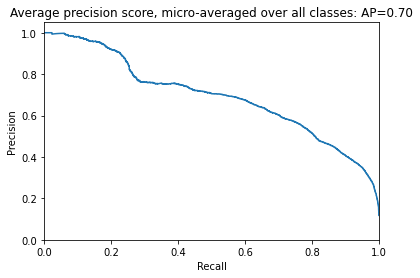

In [133]:
get_precision_score(mir_dis_df, finalQ)

In [134]:
from sklearn.metrics import roc_curve, auc

In [135]:
def get_roc_curve(ori_df, pre_matrix):
    column_names = ori_df.columns
        
    # For each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    ori_matrix = ori_df.to_numpy()
    for i in range(len(column_names)):
        fpr[i], tpr[i], _ = roc_curve(ori_matrix[:, i], pre_matrix[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # A "micro-average": quantifying score on all classes jointly
    fpr["micro"], tpr["micro"], _ = roc_curve(ori_matrix.ravel(), pre_matrix.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    print('ROC AUC: {0:0.2f}'.format(roc_auc["micro"]))
    
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ROC AUC: 0.98


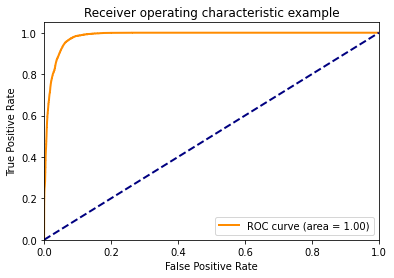

In [136]:
get_roc_curve(mir_dis_df, finalQ)

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

In [35]:
miR_sim_df.shape

(550, 550)

In [36]:
miR_sim_df.sum(axis=0)

hsa-let-7a-1    180.907568
hsa-let-7a-2    178.594420
hsa-let-7a-3    175.355885
hsa-let-7b      173.777359
hsa-let-7c      171.441226
                   ...    
hsa-mir-663b    125.349590
hsa-mir-3940     47.106050
hsa-mir-190b     43.500384
hsa-mir-1228     90.484401
hsa-mir-3148     13.043965
Length: 550, dtype: float64

In [37]:
# initiate a zero matrix
miR_dia_matrix = np.zeros(miR_sim_df.shape)

In [38]:
np.fill_diagonal(miR_dia_matrix, miR_sim_df.sum(axis=0))

In [39]:
miR_dia_matrix

array([[180.90756759,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 178.59441967,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 175.35588539, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  43.50038435,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         90.48440147,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  13.04396544]])

In [40]:
temp_identity_matrix = np.zeros(miR_sim_df.shape)
np.fill_diagonal(temp_identity_matrix, 1)

In [41]:
temp_identity_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
miR_sim_matrix = miR_sim_df.to_numpy()

In [44]:
miR_diff_dia_sim = miR_dia_matrix-miR_sim_matrix

In [45]:
miR_diff_dia_sim

array([[ 1.79907568e+02, -9.80268547e-01, -9.76503841e-01, ...,
        -6.77672624e-02, -1.48488534e-01, -1.16941387e-02],
       [-9.80268547e-01,  1.77594420e+02, -9.79512195e-01, ...,
        -6.84801007e-02, -1.39699283e-01, -1.25294344e-02],
       [-9.76503841e-01, -9.79512195e-01,  1.74355885e+02, ...,
        -7.14512037e-02, -1.40266177e-01, -1.25294344e-02],
       ...,
       [-6.77672624e-02, -6.84801007e-02, -7.14512037e-02, ...,
         4.25003843e+01, -1.73775671e-02,  0.00000000e+00],
       [-1.48488534e-01, -1.39699283e-01, -1.40266177e-01, ...,
        -1.73775671e-02,  8.94844015e+01,  0.00000000e+00],
       [-1.16941387e-02, -1.25294344e-02, -1.25294344e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.20439654e+01]])

In [46]:
mir_dis_df = pd.read_csv('../data/l1_norm/miRNA_disease_association.txt', delimiter='\t',header=0, index_col=0)

In [47]:
mir_dis_df

,Colonic Neoplasms,Heart Failure,Lung Neoplasms,Neoplasms,Breast Neoplasms,"Muscular Disorders, Atrophic","Carcinoma, Hepatocellular",Myotonic Dystrophy,Pancreatic Neoplasms,Prostatic Neoplasms,...,Acute Lung Injury,"Neoplasms, Glandular and Epithelial",Myasthenia Gravis,Stomach Diseases,Cicatrix,Diabetes Complications,Oligodendroglioma,Vascular Calcification,Lung Diseases,Vitiligo
hsa-let-7a-1,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
hsa-let-7a-2,1,1,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hsa-let-7a-3,1,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hsa-let-7b,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
hsa-let-7c,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-mir-663b,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hsa-mir-3940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hsa-mir-190b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hsa-mir-1228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
mir_dis_matrix = mir_dis_df.to_numpy()

In [56]:
Q = np.linalg.solve(miR_diff_dia_sim+temp_identity_matrix,mir_dis_matrix)

In [159]:
Q.shape

(550, 328)

In [94]:
rowA = np.vstack(np.sum(Q*Q, axis = 1))

In [95]:
rowA

array([[1.77245264],
       [1.76878791],
       [1.7674213 ],
       [1.7642608 ],
       [1.76123549],
       [1.75930495],
       [1.75764961],
       [1.75432855],
       [1.7546334 ],
       [1.75145892],
       [1.75007533],
       [1.75559086],
       [1.7507371 ],
       [1.73816605],
       [1.74435801],
       [1.74684626],
       [1.75139604],
       [1.74861502],
       [1.75361975],
       [1.77453979],
       [1.76639166],
       [1.74346653],
       [1.75442355],
       [1.75313834],
       [1.74979622],
       [1.75094739],
       [1.78542534],
       [1.77491015],
       [1.78108742],
       [1.74347528],
       [1.72960304],
       [1.72786629],
       [1.73888051],
       [1.72282883],
       [1.73385681],
       [1.75175747],
       [1.75171693],
       [1.75938564],
       [1.71285151],
       [1.73797897],
       [1.73797897],
       [1.6824724 ],
       [1.7320436 ],
       [1.74811439],
       [1.75832287],
       [1.77124675],
       [1.71614051],
       [1.784

In [98]:
matrix_A = np.repeat(rowA, len(rowA), axis=1)

In [116]:
rowB = np.hstack(np.sum(Q*Q, axis = 1))

In [117]:
rowB

array([1.77245264, 1.76878791, 1.7674213 , 1.7642608 , 1.76123549,
       1.75930495, 1.75764961, 1.75432855, 1.7546334 , 1.75145892,
       1.75007533, 1.75559086, 1.7507371 , 1.73816605, 1.74435801,
       1.74684626, 1.75139604, 1.74861502, 1.75361975, 1.77453979,
       1.76639166, 1.74346653, 1.75442355, 1.75313834, 1.74979622,
       1.75094739, 1.78542534, 1.77491015, 1.78108742, 1.74347528,
       1.72960304, 1.72786629, 1.73888051, 1.72282883, 1.73385681,
       1.75175747, 1.75171693, 1.75938564, 1.71285151, 1.73797897,
       1.73797897, 1.6824724 , 1.7320436 , 1.74811439, 1.75832287,
       1.77124675, 1.71614051, 1.78498245, 1.79893598, 1.76071527,
       1.75554991, 1.71510683, 1.754158  , 1.74015424, 1.7279123 ,
       1.6892919 , 1.8070196 , 1.75861237, 1.73952066, 1.77388562,
       1.77267171, 1.79170523, 1.766089  , 1.76123983, 1.75104109,
       1.74764734, 1.72362797, 1.71923416, 1.76046723, 1.75338729,
       1.72568811, 1.714338  , 1.77533072, 1.73902253, 1.73359

In [119]:
rowB = np.reshape(rowB, (-1, len(rowB)))

In [120]:
rowB

array([[1.77245264, 1.76878791, 1.7674213 , 1.7642608 , 1.76123549,
        1.75930495, 1.75764961, 1.75432855, 1.7546334 , 1.75145892,
        1.75007533, 1.75559086, 1.7507371 , 1.73816605, 1.74435801,
        1.74684626, 1.75139604, 1.74861502, 1.75361975, 1.77453979,
        1.76639166, 1.74346653, 1.75442355, 1.75313834, 1.74979622,
        1.75094739, 1.78542534, 1.77491015, 1.78108742, 1.74347528,
        1.72960304, 1.72786629, 1.73888051, 1.72282883, 1.73385681,
        1.75175747, 1.75171693, 1.75938564, 1.71285151, 1.73797897,
        1.73797897, 1.6824724 , 1.7320436 , 1.74811439, 1.75832287,
        1.77124675, 1.71614051, 1.78498245, 1.79893598, 1.76071527,
        1.75554991, 1.71510683, 1.754158  , 1.74015424, 1.7279123 ,
        1.6892919 , 1.8070196 , 1.75861237, 1.73952066, 1.77388562,
        1.77267171, 1.79170523, 1.766089  , 1.76123983, 1.75104109,
        1.74764734, 1.72362797, 1.71923416, 1.76046723, 1.75338729,
        1.72568811, 1.714338  , 1.77533072, 1.73

In [123]:
matrix_B = np.repeat(rowB, repeats=rowB.shape[1], axis=0)

In [124]:
matrix_B.shape

(550, 550)

In [128]:
C = 2 * np.matmul(Q, Q.T)

In [129]:
C

array([[3.54490528, 3.54114801, 3.53977828, ..., 3.40486891, 3.44413502,
        3.17528422],
       [3.54114801, 3.53757583, 3.53614336, ..., 3.40135021, 3.44058196,
        3.17200955],
       [3.53977828, 3.53614336, 3.53484261, ..., 3.39997437, 3.43919199,
        3.17072884],
       ...,
       [3.40486891, 3.40135021, 3.39997437, ..., 3.2730314 , 3.30956352,
        3.05131839],
       [3.44413502, 3.44058196, 3.43919199, ..., 3.30956352, 3.34809221,
        3.08645807],
       [3.17528422, 3.17200955, 3.17072884, ..., 3.05131839, 3.08645807,
        2.85985798]])

In [130]:
dis = matrix_A + matrix_B - C

In [145]:
dist_Q = np.abs(dis)+np.finfo(float).eps

In [173]:
dia_dis = np.diag(Q-mir_dis_df)

In [174]:
dia_dis = np.reshape(dia_dis, (-1, len(dia_dis)))

In [178]:
dia_dis.T.shape

(328, 1)

In [183]:
temp_identity_matrix.shape

(550, 550)

In [184]:
np.matmul()

,Colonic Neoplasms,Heart Failure,Lung Neoplasms,Neoplasms,Breast Neoplasms,"Muscular Disorders, Atrophic","Carcinoma, Hepatocellular",Myotonic Dystrophy,Pancreatic Neoplasms,Prostatic Neoplasms,...,Acute Lung Injury,"Neoplasms, Glandular and Epithelial",Myasthenia Gravis,Stomach Diseases,Cicatrix,Diabetes Complications,Oligodendroglioma,Vascular Calcification,Lung Diseases,Vitiligo
hsa-let-7a-1,-0.831168,-0.743715,-0.717484,-0.754009,-0.560559,0.093499,-0.549753,0.044013,-0.783429,-0.752721,...,0.003680,0.003657,0.001832,0.003679,0.003670,0.001840,0.001834,0.005503,0.001837,0.001837
hsa-let-7a-2,-0.831114,-0.743649,-0.717437,-0.753966,-0.560528,0.093487,-0.549706,0.044005,-0.783383,0.241664,...,0.003680,0.003655,0.001831,0.003680,0.003669,0.001841,0.001834,0.005501,0.001836,0.001837
hsa-let-7a-3,-0.831033,0.250584,-0.717372,-0.753880,-0.560470,0.093469,-0.549654,0.044001,-0.783303,0.241642,...,0.003679,0.003656,0.001830,0.003678,0.003668,0.001840,0.001834,0.005499,0.001836,0.001836
hsa-let-7b,-0.830948,-0.743449,-0.717251,-0.753791,-0.560349,0.093508,-0.549568,0.044038,-0.783200,-0.752485,...,0.003678,0.003655,0.001832,0.003679,0.003680,0.001841,0.001833,0.005506,0.001836,0.001837
hsa-let-7c,-0.830932,-0.743454,-0.717289,-0.753808,-0.560454,-0.900672,-0.549653,0.044024,-0.783212,-0.752481,...,0.003675,0.003654,0.001833,0.003677,0.003674,0.001839,0.001832,0.005501,0.001837,0.001835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-mir-663b,0.161887,0.248648,0.274606,-0.753497,0.431249,0.092685,0.441924,0.043601,0.209208,0.240190,...,0.003638,0.003645,0.001814,0.003630,0.003628,0.001814,0.001824,0.005447,0.001819,0.001816
hsa-mir-3940,0.159668,0.245658,0.272150,0.235417,0.426052,0.091472,0.435979,0.043190,0.206749,0.236778,...,0.003586,0.003572,0.001787,0.003581,0.003587,0.001790,0.001797,0.005381,0.001791,0.001799
hsa-mir-190b,0.159422,0.245085,0.270769,0.235238,0.424692,0.091455,0.435585,0.042978,0.206206,0.236310,...,0.003584,0.003621,0.001787,0.003574,0.003573,0.001785,0.001809,0.005361,0.001800,0.001789
hsa-mir-1228,0.161225,0.247623,0.273331,0.237196,0.429635,0.092265,0.440121,0.043376,0.208347,0.238721,...,0.003615,0.003615,0.001814,0.003615,0.003601,0.001804,0.001816,0.005431,0.001808,0.001813


In [181]:
np.matmul(dia_dis.T, temp_identity_matrix)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 550 is different from 1)